In [1]:
from PIL import Image
from itertools import groupby
import numpy as np
import keras
from math import *
import matplotlib.pyplot as plt

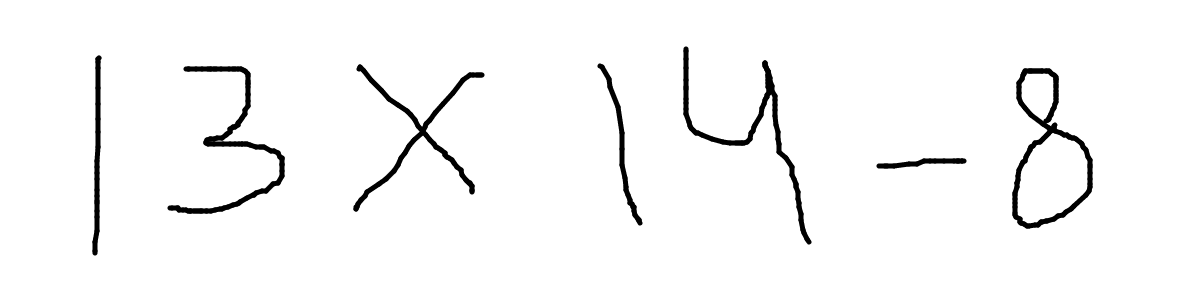

In [2]:
image = Image.open("test_images/final.png").convert("L")
image

In [3]:
image.size

(1200, 300)

In [4]:

r = image.size[0] / image.size[1] 
width = int(r * 28)
height = 28
temp = image.resize((width, height))
array = np.array(temp)

inverse_final = (255 - array)/ 255.0
lst= inverse_final.any(0)

        

In [5]:
individual_array = [inverse_final[:,[*value]] for key, value in groupby(np.arange(len(lst)), lambda x: lst[x] != 0) if key]

In [6]:
np.arange(len(lst))

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111])

In [7]:
lst

array([False, False, False, False, False, False, False, False,  True,
        True, False, False, False, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False, False, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False,  True,  True,  True,  True,  True,  True, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False, False, False, False,
       False, False, False, False])

In [8]:
inverse_final.shape

(28, 112)

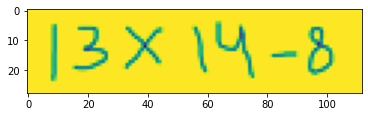

In [9]:
plt.imshow(temp)

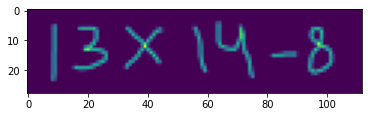

In [10]:
plt.imshow(inverse_final)

In [11]:
len(individual_array)

7

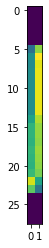

In [12]:
plt.imshow(individual_array[0])

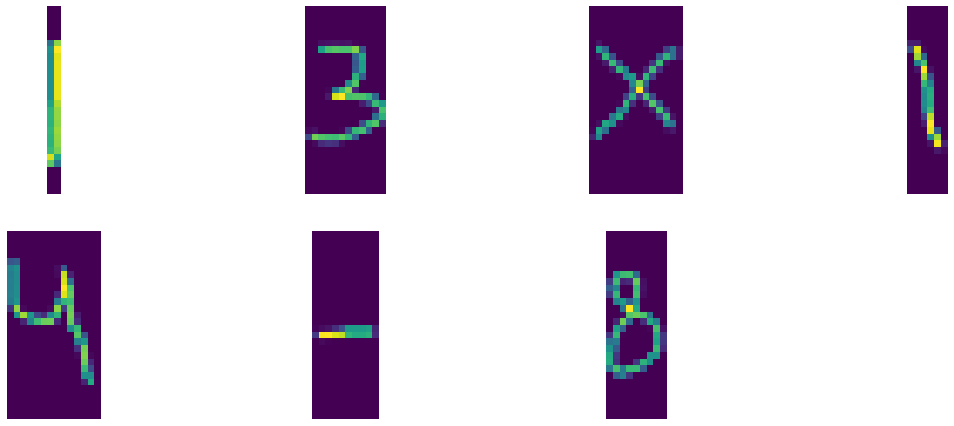

In [14]:

def plot_image(x, index):
    image = plt.imshow(x[index])
    ax.grid(False)
    ax.axis('off')    
    return image
fig = plt.figure(figsize=(20, 20))

for i in range(len(individual_array)):
    ax = fig.add_subplot(5, 4, i + 1)
    plot_image(individual_array, i)

plt.show()

In [15]:
num_of_digits = len(individual_array)
digits = []
for x in range(0, num_of_digits):
    img = individual_array[x]
            
    width = img.shape[1]
    space_to_fill= (28 - width) / 2
            
    if space_to_fill.is_integer() == False:    
        space_to_fill_l = int(space_to_fill)
        space_to_fill_r = int(space_to_fill) + 1
    else:                              
        space_to_fill_l = int(space_to_fill)
        space_to_fill_r = int(space_to_fill)
            
    space_to_fill_arr_l = np.zeros((28, space_to_fill_l))
    space_to_fill_arr_r = np.zeros((28, space_to_fill_r)) 
            
    left = np.concatenate((space_to_fill_arr_l, img), axis= 1)
    digit = np.concatenate((left, space_to_fill_arr_r), axis= 1)
            
    digit.resize(28, 28, 1) 
    digits.append(digit)
digit_array = np.array(digits)
digit_array = digit_array.reshape(-1, 28, 28, 1)
model = keras.models.load_model("model_scratch2.h5")
digits_pred =  model.predict(digit_array)
digits_pred = np.argmax(digits_pred, axis = 1)
        

In [16]:
dic={0:0,1:1,2:2,3:3,4:4,5:5,6:6,7:7,8:8,9:9,10:'/',11:'+',12:'-',13:'*'}
eqt=""
for i in digits_pred:
    eqt+=str(dic[i])+""
    print(dic[i],end=" ")
print()
print(eqt)
        
print(eval(eqt))
ans=eval(eqt)

1 3 * 1 4 - 8 
13*14-8
174
